# VISUALISATION DATA

## 1) DESCRIPTION DATASET

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target
names = list(iris.target_names)

print(f"On a {x.shape[0]} exemples ou echantillons et {x.shape[1]} variables")
print(f"Il y a {np.unique(y).size} classes")
print(names)

On a 150 exemples ou echantillons et 4 variables
Il y a 3 classes
['setosa', 'versicolor', 'virginica']


## 2) VISUALISATION

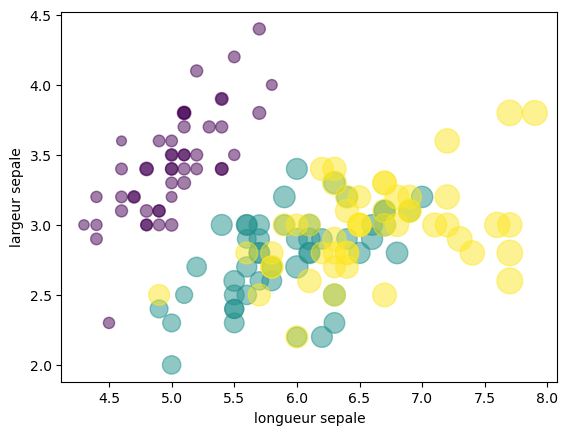

In [58]:
plt.scatter(x[:,0],x[:,1], c=y, alpha = 0.5, s = x[:,2]*50) #alpha : transparent , c = width of point # plus le point est gros plus le petale est grande 
plt.xlabel("longueur sepale")
plt.ylabel("largeur sepale")
plt.show()

## 3) Discussion a partir scatter
> * Plus le diametre de petale est grand plus la petale est grosse
> * violet (setosa), bleu (versecolor), jaune(virginica)

Text(0, 0.5, 'Largeur de sepale')

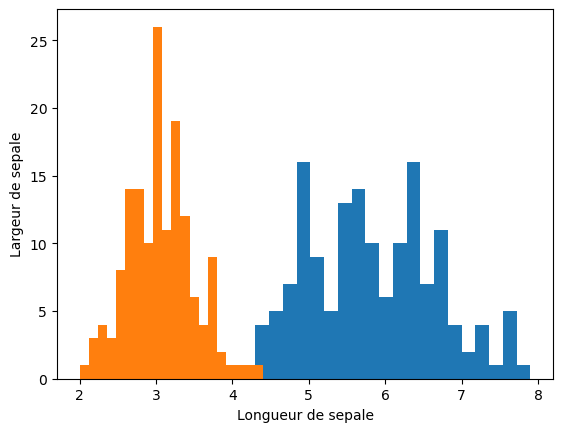

In [122]:
plt.hist(x[:,0], bins = 20) #bins : le nb de section que l'on desire avoir dans notre histogramme
# interpretation il a 16 exemplaires qui possedent une variable dans [:,0]
plt.hist(x[:,1], bins = 20)
plt.xlabel("Longueur de sepale")
plt.ylabel("Largeur de sepale")

## 3) Discussion a partir histogramme
> * Nombre de fleur ayant une caracteristique sur l'absisse

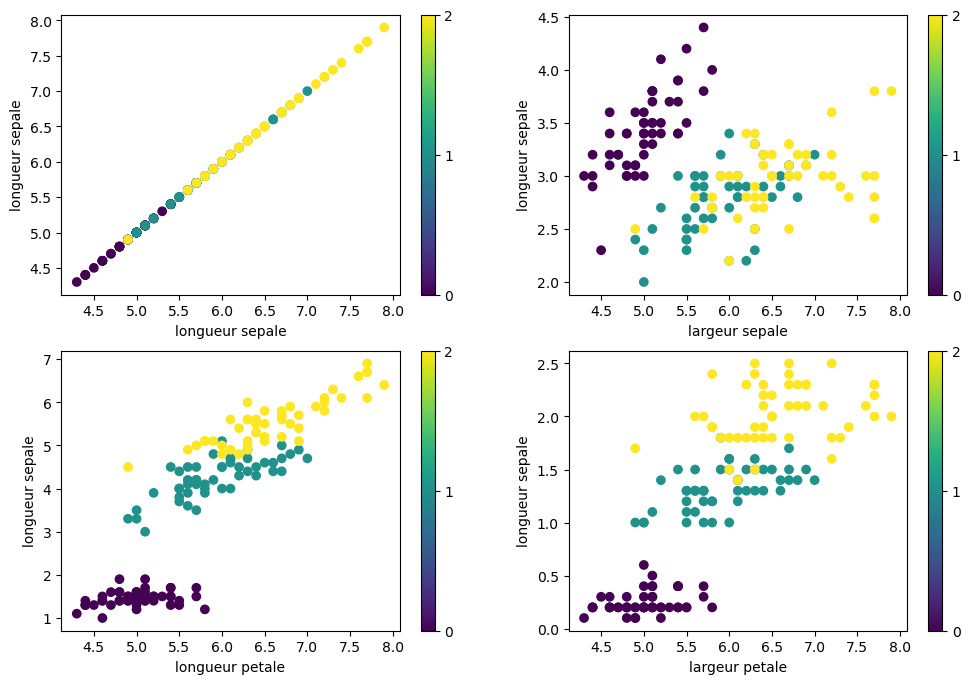

In [62]:
def graphique(x, y):
    n = x.shape[1]
    plt.figure(figsize= (12,8))
    for i in range(n) :
        plt.subplot(n//2,n//2,i+1)
        plt.scatter(x[:,0],x[:,i], c=y)
        plt.ylabel('longueur sepale')
        if i == 0 :
            plt.xlabel("longueur sepale")
        if i == 1 :
            plt.xlabel("largeur sepale")
        if i == 2 :
            plt.xlabel("longueur petale")
        if i == 3 :
            plt.xlabel("largeur petale")
        
        plt.colorbar(ticks=list(np.unique(y)))
    plt.show()
    
x = iris.data
y = iris.target
graphique(x,y)

## 3) Discussion a partir scatter subplot
> * le colorbar montre les trois classes de l'iris (0,1,2) = ('setosa', 'versicolor', 'virginica')
> * classification des iris selon les variables (longueur/largeur sepale, longueur/largeur petale)
> *  conclusion : la classification se distingue au niveau de longueur de sepale et longueur/largeur de petale

# MACHINE LEARNING

##  Splitting the dataset into the Training set and Test set

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [264]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set


In [144]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting a new result

In [147]:
print(classifier.predict(sc.transform([[3.8, 1.7, 3.9, 1.2]])))
# print(classifier.predict([[3.8, 1.7, 3.9, 1.2]])))

[1]


### Predicting the Test set results

In [150]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]]


### Making the Confusion Matrix

In [153]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


97.36842105263158

## K-NN

In [287]:
from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 7, p = 4)
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'manhattan', p = 1)
# classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, p=1)

### Predicting a new result

In [290]:
print(classifier.predict(sc.transform([[3.8, 1.7, 3.9, 1.2]])))
# print(classifier.predict([[3.8, 1.7, 3.9, 1.2]])))

[1]


### Predicting the Test set results

In [293]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]]


### Making the Confusion Matrix

In [296]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


97.36842105263158

### 5) Comparaison 
* si k neighbors >= 7 :     accuracy_score de Logistic regression == KNN = 97,368 %
* si k neighbors == 2 :     accuracy_score de KNN == 94.73 %  ( ici Logictic Regression est plus performant )
* Meme si on change le calcul de distance(manhattan,minkowski ) le accuracy_score ne change pas

### CONCLUSION
Le KNN est plus fiable car on peut controller le nombre de voisin K  et le score donne 97%